In [1]:
# from lib import MongoHandler, WeatherGetter

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

%matplotlib inline

In [3]:
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()

## The names of the teams

In [4]:
cur.execute("""SELECT DISTINCT HomeTeam
               FROM matches
               WHERE NOT Div = 'E0'
               AND season = 2011
               ORDER BY HomeTeam
               """)
name_lst = cur.fetchall()
len(name_lst)

36

In [5]:
team_names = []
for name in name_lst:
    team_names.append(name[0])
len(team_names)

36

## The total number of goals scored by each team and the total number of wins each team earned during the 2011 season

In [6]:
cur.execute("""SELECT Date, HomeTeam, AwayTeam, FTHG as HomeGoals, FTAG as AwayGoals, FTR as Result
               FROM matches
               WHERE NOT Div = 'E0'
               AND Season = 2011   
            """)
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
display(df.head(), df.shape)

,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result
0,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,2011-11-27,Mainz,Bayern Munich,3,2,H
4,2012-02-18,Freiburg,Bayern Munich,0,0,D


(612, 6)

In [7]:
# Now we split the df into home, away, and results dataframes
# 17 home games per team, 17 away games per team

df_home = df.drop(['AwayTeam', 'AwayGoals', 'Result', 'Date'], axis=1).groupby(['HomeTeam'], sort = True).sum()
display(df_home.head(),df_home.shape)

,HomeGoals
HomeTeam,
Aachen,15
Augsburg,20
Bayern Munich,49
Bochum,23
Braunschweig,21


(36, 1)

In [8]:
df_away = df.drop(['HomeTeam', 'HomeGoals', 'Result', 'Date'], axis=1).groupby(['AwayTeam'], sort = True).sum()
display(df_away.head(), df_away.shape)

,AwayGoals
AwayTeam,
Aachen,15
Augsburg,16
Bayern Munich,28
Bochum,18
Braunschweig,16


(36, 1)

In [9]:
df_home_away = pd.concat([df_home, df_away], axis=1)
df_home_away.head()

,HomeGoals,AwayGoals
Aachen,15,15
Augsburg,20,16
Bayern Munich,49,28
Bochum,23,18
Braunschweig,21,16


In [10]:
# Winners list

win_lst = []
for index in range(len(df)):
    
    if df.Result[index] == 'H':
        win_lst.append(df.HomeTeam[index])
        
    elif df.Result[index] == 'A':
        win_lst.append(df.AwayTeam[index])

In [11]:
len(win_lst)

442

In [12]:
total_win_lst = []
for team in team_names:
    total_win_lst.append(win_lst.count(team))

len(total_win_lst)

36

In [13]:
# Lossers list

loss_lst = []
for index in range(len(df)):
    
    if df.Result[index] == 'H':
        loss_lst.append(df.AwayTeam[index])
        
    elif df.Result[index] == 'A':
        loss_lst.append(df.HomeTeam[index])
len(loss_lst)

442

In [14]:
total_lost_lst = []
for team in team_names:
    total_lost_lst.append(loss_lst.count(team))

len(total_lost_lst)

36

In [15]:
# Dataframe of each teams goals, win, loss, and draw

df_home_away['TotalGoals'] = df_home_away['HomeGoals'] + df_home_away['AwayGoals']
df_home_away['TotalWins'] = total_win_lst
df_home_away['TotalLost'] = total_lost_lst
df_home_away['Draws'] = 34 - df_home_away['TotalWins'] - df_home_away['TotalLost']
df_home_away.head()

,HomeGoals,AwayGoals,TotalGoals,TotalWins,TotalLost,Draws
Aachen,15,15,30,6,15,13
Augsburg,20,16,36,8,12,14
Bayern Munich,49,28,77,23,7,4
Bochum,23,18,41,10,17,7
Braunschweig,21,16,37,10,9,15


## A histogram visualization of the team's wins and losses for the 2011 season

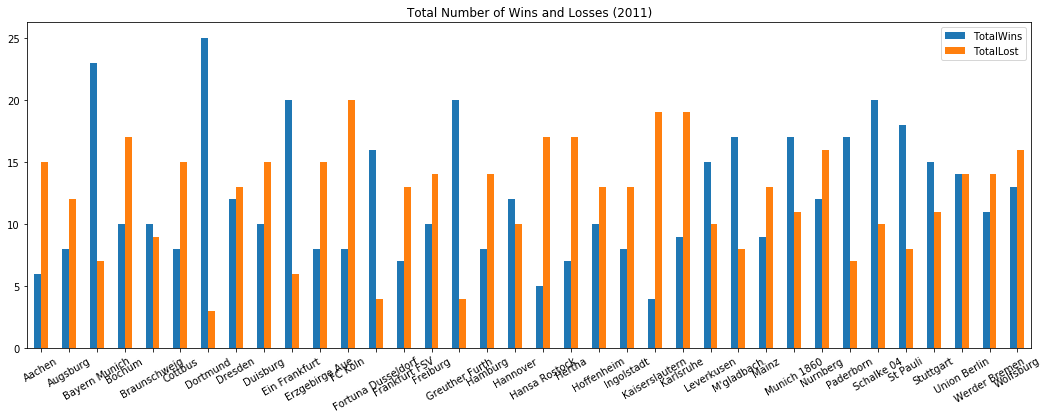

In [16]:
ax = df_home_away.plot.bar(y=['TotalWins', 'TotalLost'], rot=30, figsize=(18,6), title="Total Number of Wins and Losses (2011)")
ax

## The team's win percentage on days where it was raining during games in the 2011 season. 

In [17]:
from dotenv import load_dotenv
import os
load_dotenv()


True

In [18]:
key = os.getenv('DARKSKY_KEY')

In [19]:
# Test the API with one time

lat = '52.5200'
long = '13.4050'
year = '2011'
month = '10'
day = '28'
hour = '21'
minute = '45'
second = '00'

In [20]:
# Commented out to prevent further requests

# request = requests.get('https://api.darksky.net/forecast/{}/{},{},{}-{}-{}T{}:{}:{}?units=si&exclude=daily,minutely,hourly,alerts,flags'.format(key, lat, long, 
#                                                                                                                                                 year, month, 
#                                                                                                                                                 day, hour, 
#                                                                                                                                                 minute, second))

In [21]:
# weather = request.json()

In [22]:
# weather

In [23]:
df.Date[0][:4]

'2012'

In [24]:
df.Date[0][5:7]

'03'

In [25]:
df.Date[0][8:10]

'31'

In [26]:
df.Date[0]

'2012-03-31'

In [27]:
df['Year'] = df.Date.apply(lambda x: x[:4])
df['Month'] = df.Date.apply(lambda x: x[5:7])
df['Day'] = df.Date.apply(lambda x: x[8:10])
df.head()

,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Year,Month,Day
0,2012-03-31,Nurnberg,Bayern Munich,0,1,A,2012,03,31
1,2011-12-11,Stuttgart,Bayern Munich,1,2,A,2011,12,11
2,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,2011,08,13
3,2011-11-27,Mainz,Bayern Munich,3,2,H,2011,11,27
4,2012-02-18,Freiburg,Bayern Munich,0,0,D,2012,02,18


In [28]:
# weather_data =[]
# for i in range(len(df)):
#     year = df.Year[i]
#     month = df.Month[i]
#     day = df.Day[i]
#     hour = '15'
#     minute = '00'
#     second = '00'
#     rqst = requests.get('https://api.darksky.net/forecast/{}/{},{},{}-{}-{}T{}:{}:{}?units=si&exclude=daily,minutely,hourly,alerts,flags'.format(key, lat, long, 
#                                                                                                                                                 year, month, day,
#                                                                                                                                             hour, minute, second))
#     datum = rqst.json()
#     weather_data.append(datum)

In [29]:
# Code to save the weather_data as a json
# weather_data

# with open('./weather_data.json', 'w+') as f:
#     f.write(json.dumps(weather_data, sort_keys=True, indent=4))

In [30]:
f = open('weather_data.json')
weather_data = json.load(f)
weather_data[83]
# Problem with the 84th not having precip

{'currently': {'apparentTemperature': 4.37,
  'cloudCover': 0.75,
  'dewPoint': 4.01,
  'humidity': 0.76,
  'icon': 'partly-cloudy-day',
  'summary': 'Mostly Cloudy',
  'temperature': 7.99,
  'time': 1322316000,
  'uvIndex': 0,
  'visibility': 10.003,
  'windBearing': 236,
  'windSpeed': 6.97},
 'latitude': 52.52,
 'longitude': 13.405,
 'offset': 1,
 'timezone': 'Europe/Berlin'}

In [31]:
for i in range(len(df)):
    print(weather_data[i]['currently']['icon'])

partly-cloudy-day
partly-cloudy-day
partly-cloudy-day
partly-cloudy-day
partly-cloudy-day
partly-cloudy-day
clear-day
partly-cloudy-day
partly-cloudy-day
rain


KeyError: 'icon'

In [32]:
weather_data

[{'currently': {'apparentTemperature': 1.25,
   'cloudCover': 0.75,
   'dewPoint': 1.29,
   'humidity': 0.76,
   'icon': 'partly-cloudy-day',
   'precipIntensity': 0,
   'precipProbability': 0,
   'summary': 'Mostly Cloudy',
   'temperature': 5.17,
   'time': 1333198800,
   'uvIndex': 3,
   'visibility': 10.003,
   'windBearing': 311,
   'windGust': 11.31,
   'windSpeed': 5.66},
  'latitude': 52.52,
  'longitude': 13.405,
  'offset': 2,
  'timezone': 'Europe/Berlin'},
 {'currently': {'apparentTemperature': 0.52,
   'cloudCover': 0.75,
   'dewPoint': -1.45,
   'humidity': 0.69,
   'icon': 'partly-cloudy-day',
   'precipIntensity': 0,
   'precipProbability': 0,
   'summary': 'Mostly Cloudy',
   'temperature': 3.69,
   'time': 1323612000,
   'uvIndex': 0,
   'visibility': 9.996,
   'windBearing': 191,
   'windGust': 3.57,
   'windSpeed': 3.57},
  'latitude': 52.52,
  'longitude': 13.405,
  'offset': 1,
  'timezone': 'Europe/Berlin'},
 {'currently': {'apparentTemperature': 22.19,
   'cloud